# Chicago Car Accidents Analysis

Justin Lee

This notebook is prepared for the Vehicle Safety Board of Chicago. This Board aims to understand the primary contributory causes of a car accident in order to reduce traffic accidents.

### Data Understanding

This dataset is from the Chicago Data Portal. This data contains information about people involved in a crash and if any injuries were sustained. Each record corresponds to an occupant in a vehicle listed in the Crash dataset. Some people involved in a crash may not have been an occupant in a motor vehicle, but may have been a pedestrian, bicyclist, or using another non-motor vehicle mode of transportation. Person data can be linked with the Crash and Vehicle dataset using the “CRASH_RECORD_ID” field.

In [1]:
# Import any relevant library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load in our dataframe
df = pd.read_csv('traffic_crashes.csv')

df.head()

/Users/justinlee/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [3]:
df.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,1.964730e+06,405468.00000,1.422362e+06,2216.000000
mean,9.441771e+05,4.16478,3.792867e+01,0.171340
std,5.491011e+05,2.21842,1.708682e+01,0.103318
min,2.000000e+00,1.00000,-1.770000e+02,0.000000
25%,4.680342e+05,3.00000,2.500000e+01,0.127500
50%,9.363780e+05,3.00000,3.500000e+01,0.170000
75%,1.422413e+06,6.00000,5.000000e+01,0.220000
max,1.900249e+06,12.00000,1.100000e+02,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005877 entries, 0 to 2005876
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

In [5]:
# Explore number of null values
df.isnull().sum()

PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
VEHICLE_ID                 41147
CRASH_DATE                     0
SEAT_NO                  1600409
CITY                      545926
STATE                     523661
ZIPCODE                   662176
SEX                        33887
AGE                       583515
DRIVERS_LICENSE_STATE     831360
DRIVERS_LICENSE_CLASS    1030131
SAFETY_EQUIPMENT            5603
AIRBAG_DEPLOYED            39600
EJECTION                   25264
INJURY_CLASSIFICATION        757
HOSPITAL                 1682144
EMS_AGENCY               1806123
EMS_RUN_NO               1972477
DRIVER_ACTION             409055
DRIVER_VISION             409691
PHYSICAL_CONDITION        407959
PEDPEDAL_ACTION          1966543
PEDPEDAL_VISIBILITY      1966613
PEDPEDAL_LOCATION        1966542
BAC_RESULT                408136
BAC_RESULT VALUE         2003661
CELL_PHONE_USE           2004717
dtype: int64

In [6]:
# Explore our target variable counts
df['DRIVER_ACTION'].value_counts()

NONE                                 568041
UNKNOWN                              406729
FAILED TO YIELD                      145118
OTHER                                143764
FOLLOWED TOO CLOSELY                  93147
IMPROPER BACKING                      46726
IMPROPER TURN                         42036
IMPROPER LANE CHANGE                  41055
IMPROPER PASSING                      35904
DISREGARDED CONTROL DEVICES           28288
TOO FAST FOR CONDITIONS               23312
WRONG WAY/SIDE                         6449
IMPROPER PARKING                       5856
OVERCORRECTED                          3230
EVADING POLICE VEHICLE                 2473
CELL PHONE USE OTHER THAN TEXTING      2313
EMERGENCY VEHICLE ON CALL              1493
TEXTING                                 626
STOPPED SCHOOL BUS                      193
LICENSE RESTRICTIONS                     69
Name: DRIVER_ACTION, dtype: int64

### Data Preparation

In order to prepare our data for analysis we must drop any unnecessary columns, fill any NA values, scale our numerical features, and encode our categorical features.

In [7]:
# I will be dropping these columns because most rows are missing from each or they are not relevant for our analysis
# hospital, ems_agency, ems_run_no are all post-crash related - they will not help us determine the primary contributor cause of a car accident
# person_id, crash_record_id, and vehicle_id don't contribut to predicting accident cause

columns_to_drop = ['HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 'PERSON_ID', 'CRASH_RECORD_ID', 'VEHICLE_ID',
                  'PERSON_TYPE', 'CRASH_DATE', 'CITY', 'STATE', 'ZIPCODE','BAC_RESULT']
df.drop(columns=columns_to_drop, inplace=True)

Because my audience is a Vehicle Safety Board they are likely more interested in driver behavior and physical condition rather than specific pedestrain details.

For that reason, our best target column candidates are driver_action, physical_condition, and cell_phone_use. Let's explore the data for each candidate to make an informed choice.

In [8]:
# Check the distribution of values in each potential target column:

candidate_columns = ["DRIVER_ACTION", "PHYSICAL_CONDITION", "CELL_PHONE_USE"]

for col in candidate_columns:
    print(f"\n{col} - Unique Values: {df[col].nunique()}")
    print(df[col].value_counts(normalize=True).head(10))  # View top 10 most common causes


DRIVER_ACTION - Unique Values: 20
NONE                           0.355732
UNKNOWN                        0.254712
FAILED TO YIELD                0.090879
OTHER                          0.090031
FOLLOWED TOO CLOSELY           0.058333
IMPROPER BACKING               0.029262
IMPROPER TURN                  0.026325
IMPROPER LANE CHANGE           0.025710
IMPROPER PASSING               0.022485
DISREGARDED CONTROL DEVICES    0.017715
Name: DRIVER_ACTION, dtype: float64

PHYSICAL_CONDITION - Unique Values: 12
NORMAL                0.646548
UNKNOWN               0.334970
IMPAIRED - ALCOHOL    0.004215
REMOVED BY EMS        0.003610
OTHER                 0.002908
EMOTIONAL             0.002694
FATIGUED/ASLEEP       0.002598
ILLNESS/FAINTED       0.000891
HAD BEEN DRINKING     0.000713
IMPAIRED - DRUGS      0.000459
Name: PHYSICAL_CONDITION, dtype: float64

CELL_PHONE_USE - Unique Values: 2
Y    0.649138
N    0.350862
Name: CELL_PHONE_USE, dtype: float64


DRIVER_ACTION will be my *target* variable because it
- directly describes driver behavior leading to crashes
- has specific categories (ie. FAILED TO YIELD, FOLLOWING TOO CLOSELY) that align with real-world accident causes
- has more predictive power than PHYSICAL_CONDITION or CELL_PHONE_USE

PHYSICAL_CONDITION has 64.65% of "NORMAL" values and 33.5% of "UNKNOWN" values which means there are only around 2% of cases that indicated impaired or emotional conditions.

CELL_PHONE_USE is relatively balanced between Y and N. It also does not have a broad cause of accidents. It is just binary.

In [9]:
# Group NONE and UNKNOWN values from DRIVER_ACTION into an "UNSPECIFIED" category.
df["DRIVER_ACTION"] = df["DRIVER_ACTION"].replace(["NONE", "UNKNOWN"], "UNSPECIFIED")

In [10]:
# Encode DRIVER_ACTION for model training
encoder = LabelEncoder()
df["DRIVER_ACTION"] = df["DRIVER_ACTION"].astype(str)
df["DRIVER_ACTION"] = encoder.fit_transform(df["DRIVER_ACTION"])

In [11]:
# Normalize/scale numerical features
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [12]:
# Identify categorical columns to encode
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['SEX', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'CELL_PHONE_USE']


In [13]:
# Let's assume these 3 columns have some sort of inherent order to them
# Because of the assumed inherent order, we will label encode
label_cols = ["DRIVERS_LICENSE_STATE", "DRIVERS_LICENSE_CLASS", "PHYSICAL_CONDITION"]

for col in label_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))  # Ensure it's string before encoding


In [14]:
# Let's assume these remaining columns don't have a natural order to them. This makes them fit for one-hot encoding
one_hot_cols = [
    "SEX", "SAFETY_EQUIPMENT", "AIRBAG_DEPLOYED", "EJECTION",
    "INJURY_CLASSIFICATION", "DRIVER_VISION", "PEDPEDAL_ACTION",
    "PEDPEDAL_VISIBILITY", "PEDPEDAL_LOCATION", "CELL_PHONE_USE"
]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)  # Drop first category to avoid multicollinearity


In [15]:
# Now a final check to make sure no more object-type columns exist
print(df.dtypes)

SEAT_NO                             float64
AGE                                 float64
DRIVERS_LICENSE_STATE                 int64
DRIVERS_LICENSE_CLASS                 int64
DRIVER_ACTION                       float64
                                     ...   
PEDPEDAL_LOCATION_IN ROADWAY          uint8
PEDPEDAL_LOCATION_NOT IN ROADWAY      uint8
PEDPEDAL_LOCATION_SHOULDER            uint8
PEDPEDAL_LOCATION_UNKNOWN/NA          uint8
CELL_PHONE_USE_Y                      uint8
Length: 87, dtype: object


In [16]:
obj_cols = df.select_dtypes(include=["object"]).columns
print("Object Columns:", obj_cols)

Object Columns: Index([], dtype='object')


### Baseline Model

We will use a Decision Tree Classifier as our baseline model because our DRIVER_ACTION target is a multi-class target and it is easily interpretable for an initial benchmark for performance. 

In [17]:
# Separate features (X) and target (y)
X = df.drop(columns=["DRIVER_ACTION"])
y = df["DRIVER_ACTION"]

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1604701, 86)
Testing data shape: (401176, 86)


In [18]:
# Remove null values
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# DRIVER_ACTION should be a classification target so it must get converted to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

/Users/justinlee/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [19]:
# Initialize the model
baseline_model = DecisionTreeClassifier(random_state=42)

# Train the model
baseline_model.fit(X_train, y_train)

# Predict on our test set
y_pred = baseline_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.7808


### Baseline Model - Evaluation

For our model evaluations, we will use a confusion matrix and classification report to evaluate our model's strengths and weaknesses. A confusion matrix gives us a detailed breakdown of prediction errors whereas the classification report gives a numerical summary of key performance indicators.

Classification Report:
               precision    recall  f1-score   support

          -2       0.20      0.05      0.08     35939
          -1       0.16      0.02      0.04     44537
           0       0.80      0.97      0.88    320700

    accuracy                           0.78    401176
   macro avg       0.39      0.35      0.33    401176
weighted avg       0.68      0.78      0.71    401176



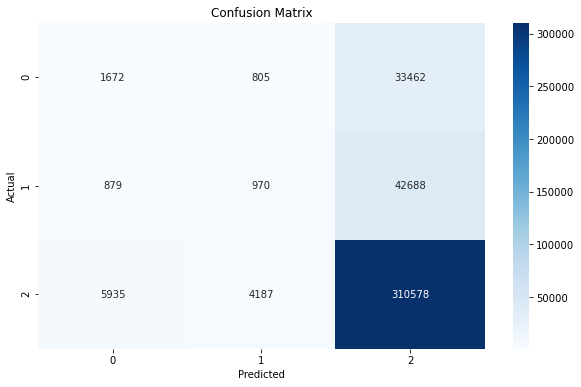

In [20]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Our Decision Tree classifier correctly predicts the primary contributory cause in about 78% of cases.

Class 0 has a high recall of 97% and F1-score of 88%, meaning our model heavily favors this class. Classes -2 and -1 have low recall scores meaning they are rarely predicted correctly. Most predictions fall into class 0 (making up 320,700 cases) whereas many instances of class -2 and -1 are misclassified as 0. This suggests class imbalance.

Because our baseline model has a biased towards the majority class of 0, our iterated model will address handling class imbalance.

### Balanced Model

Due to the large majority class bias we saw in our baseline model, we will use sklearn's classifier to alow class_weight = 'balanced', which automatically assigns higher weight to minority class.

In [21]:
# Initializing Decision Tree with balanced class weights
balanced_model = DecisionTreeClassifier(random_state=42, class_weight="balanced")

# Train the model
balanced_model.fit(X_train, y_train)

# Predict on test set
y_pred_balanced = balanced_model.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_balanced)
print(f"Balanced Model Accuracy: {accuracy:.4f}")

Balanced Model Accuracy: 0.4940


### Balanced Model - Evaluation

Balanced Model - Classification Report:

              precision    recall  f1-score   support

          -2       0.14      0.28      0.18     35939
          -1       0.18      0.61      0.28     44537
           0       0.91      0.50      0.65    320700

    accuracy                           0.49    401176
   macro avg       0.41      0.46      0.37    401176
weighted avg       0.76      0.49      0.56    401176



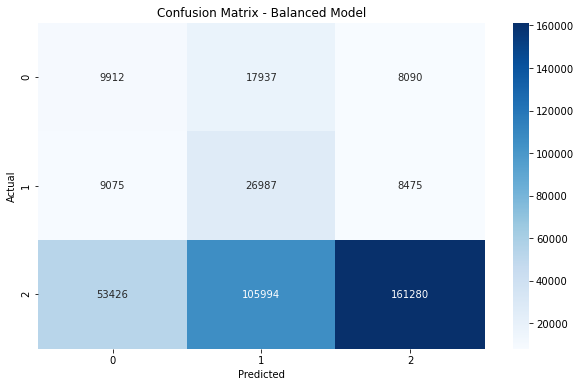

In [22]:
# Print classification report
print("Balanced Model - Classification Report:\n")
print(classification_report(y_test, y_pred_balanced))

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_balanced), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Balanced Model")
plt.show()


Our balanced model has some improvements compared to our baseline model. Our balanced model now recognizes minority classes -2 and -1 much better, the recall for class -1 increased from 2% to 61%, and we overall now have more balanced predictions rather than predicting class 0 for everything.

We do also see more problems with our balanced model. Our accuracy dropped significantly from 78% to 49%, likely because our model now misclassifies a lot of the 0 cases. Our 0 class also dropped in recall from 97% to 50%, meaning it no longer prioritizes the dominant class. Lastly, our precision is low for minority classes (14%-18%) which could mean that this is incorrectly predicting -2 and -1.

### Conclusion

After testing two models, a baseline Decision Tree and a balanced Decision Tree using class weights, we can see a distinct trade-off between overall accuracy and fairness in class representation.

Our baseline model had high accuracy but was biased. This baseline model performs well overall but heavily factors the majority class of 0. This means that our model is not useful for identifying less common accident causes because it misclassifies them most of the time.

Our balanced iterated model is fairer but has worse accuracy. Our model improved the recall score for both the minority classes (-2 and -1) but the accuracy dropped from 78% to 49%.

Our averaged F1-score increased from 0.33 to 0.37. This suggests that our balanced model is slightly better at handling all classes.

Because our audience is the Vehicle Safety Board, they might care about idetnifying the primary cause of accidents, especially minority causes, to develop better safety policies and prevention strategies. The Vehicle Safety Board might also care more about balanced performance across all causes.

For a Vehicle Safety Board, the best approach is to prioritize recall (how well our model identifies actual cases of a class) and fairness over pure accuracy. The balanced Decision Tree is a better choice for this business problem than the baseline model.

### Next Steps

There are a few next steps we could go with our model.

We can improve upon our model's performance. A next iterated model we could explore is the Random Forest model, which handles imbalanced data better than a single Decision Tree and reduces overfitting.

We could consider external factors to add into our data. Weather data, traffic density, and road conditions would all be great factors to add to our data to help improve model accuracy by adding environmental context.

We could create policy recommendations based on our model results. For example, if impaired driving is a leading cause of crashes we could enforce stricter DUI regulations, if road conditions played a major role then we could advocate for better road lighting, if cell phone usage was a major factor we could increase penalties for distracted driving.